In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sncosmo
import emcee
from multiprocessing import Pool
import glob
import quadpy
from matplotlib.offsetbox import AnchoredText
import getdist
from getdist import plots, MCSamples
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid", {'axes.grid':'False','xtick.bottom': True,'ytick.left': True})

params = {"text.usetex" : True,'font.size': 20, 'font.family':'serif', 'font.serif':'Computer Modern'}
plt.rcParams.update(params)

gk = quadpy.c1.gauss_kronrod(40)

In [2]:
pantheon_ori_fits=pd.read_csv("pantheon_original_fit.txt",sep="\s+")

## Carregando dados EXP

In [3]:
glob.glob("./lc_fit_results*.txt")

['./lc_fit_results_EXP_FA_QUARTIMAX_PS1_Pantheon.txt',
 './lc_fit_results_EXP_FA_QUARTIMAX_SNLS_Pantheon.txt',
 './lc_fit_results_EXP_FA_QUARTIMAX_SDSS_Pantheon.txt',
 './lc_fit_results_EXP_FA_QUARTIMAX_HST_Pantheon.txt',
 './lc_fit_results_EXP_FA_QUARTIMAX_LOWZ_Pantheon.txt']

In [4]:
SDSS_fits=pd.read_csv("./lc_fit_results_EXP_FA_QUARTIMAX_SDSS_Pantheon.txt",sep="\s+")
SNLS_fits=pd.read_csv("./lc_fit_results_EXP_FA_QUARTIMAX_SNLS_Pantheon.txt",sep="\s+")
PS1_fits=pd.read_csv("./lc_fit_results_EXP_FA_QUARTIMAX_PS1_Pantheon.txt",sep="\s+")
HST_fits=pd.read_csv("./lc_fit_results_EXP_FA_QUARTIMAX_HST_Pantheon.txt",sep="\s+")
LOWZ_fits=pd.read_csv("./lc_fit_results_EXP_FA_QUARTIMAX_LOWZ_Pantheon.txt",sep="\s+")

## LOWZ

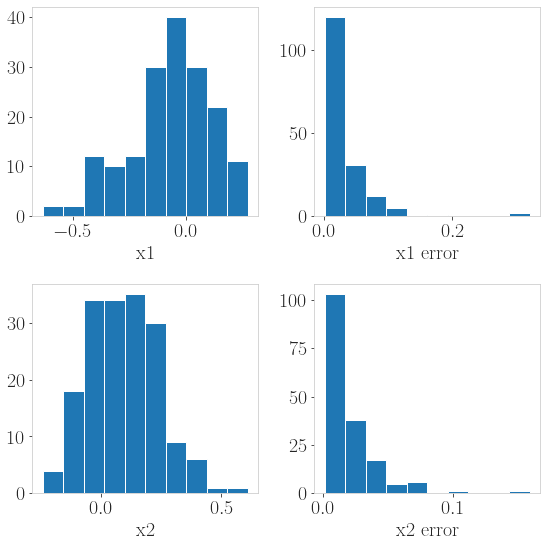

In [5]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

axs[0,0].hist(LOWZ_fits[abs(LOWZ_fits["X1"])<1.]["X1"])
axs[0,0].set_xlabel("x1")
axs[0,1].hist(LOWZ_fits[abs(LOWZ_fits["X1ERR"])<1.]["X1ERR"])
axs[0,1].set_xlabel("x1 error")
axs[1,0].hist(LOWZ_fits[abs(LOWZ_fits["X2/C"])<1.]["X2/C"])
axs[1,0].set_xlabel("x2")
axs[1,1].hist(LOWZ_fits[abs(LOWZ_fits["X2/CERR"])<1.]["X2/CERR"])
axs[1,1].set_xlabel("x2 error")
fig.tight_layout();

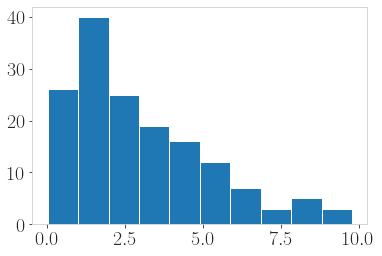

In [6]:
plt.hist(LOWZ_fits[LOWZ_fits["CHISQ/NDOF"]<10]["CHISQ/NDOF"]);

## SDSS

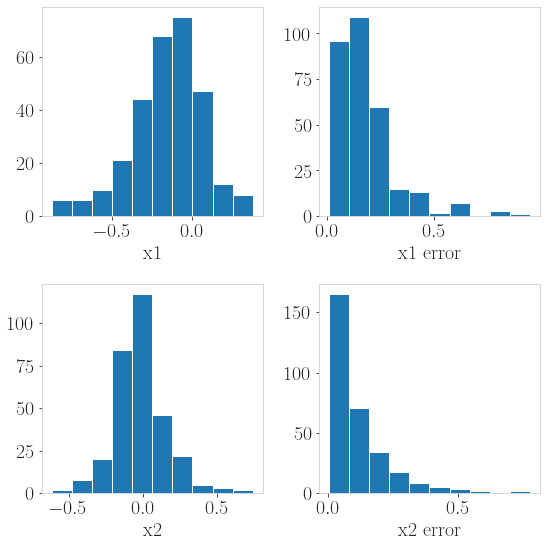

In [7]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

axs[0,0].hist(SDSS_fits[abs(SDSS_fits["X1"])<1.]["X1"])
axs[0,0].set_xlabel("x1")
axs[0,1].hist(SDSS_fits[abs(SDSS_fits["X1ERR"])<1.]["X1ERR"])
axs[0,1].set_xlabel("x1 error")
axs[1,0].hist(SDSS_fits[abs(SDSS_fits["X2/C"])<1.]["X2/C"])
axs[1,0].set_xlabel("x2")
axs[1,1].hist(SDSS_fits[abs(SDSS_fits["X2/CERR"])<1.]["X2/CERR"])
axs[1,1].set_xlabel("x2 error")
fig.tight_layout();

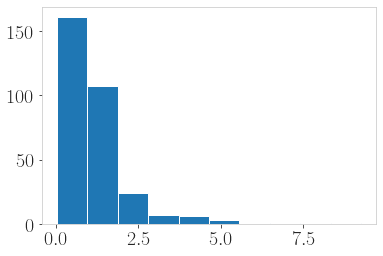

In [8]:
plt.hist(SDSS_fits[SDSS_fits["CHISQ/NDOF"]<10]["CHISQ/NDOF"]);

## SNLS

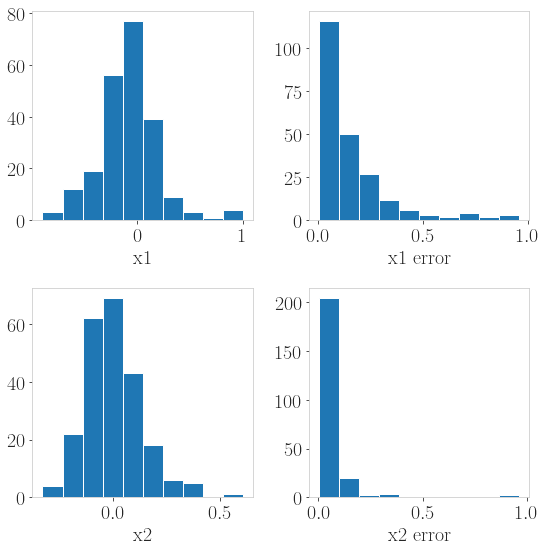

In [9]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

axs[0,0].hist(SNLS_fits[abs(SNLS_fits["X1"])<1.]["X1"])
axs[0,0].set_xlabel("x1")
axs[0,1].hist(SNLS_fits[abs(SNLS_fits["X1ERR"])<1.]["X1ERR"])
axs[0,1].set_xlabel("x1 error")
axs[1,0].hist(SNLS_fits[abs(SNLS_fits["X2/C"])<1.]["X2/C"])
axs[1,0].set_xlabel("x2")
axs[1,1].hist(SNLS_fits[abs(SNLS_fits["X2/CERR"])<1.]["X2/CERR"])
axs[1,1].set_xlabel("x2 error")
fig.tight_layout();

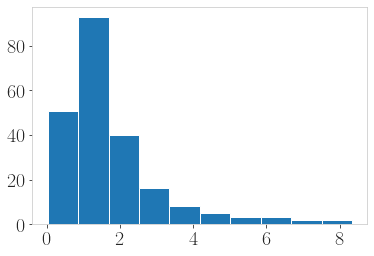

In [10]:
plt.hist(SNLS_fits[SNLS_fits["CHISQ/NDOF"]<10]["CHISQ/NDOF"]);

## PS1

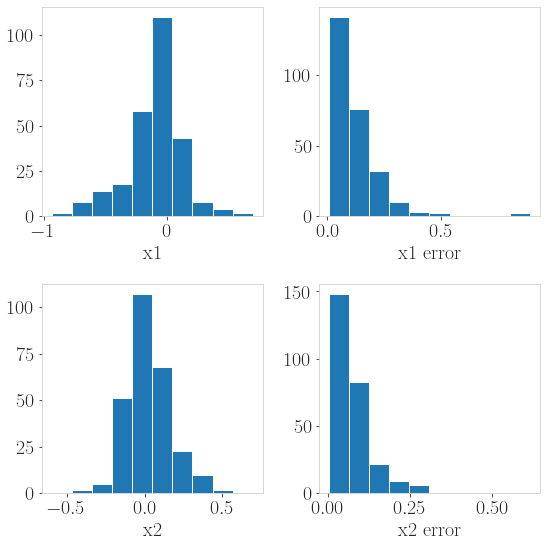

In [11]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

axs[0,0].hist(PS1_fits[abs(PS1_fits["X1"])<1.]["X1"])
axs[0,0].set_xlabel("x1")
axs[0,1].hist(PS1_fits[abs(PS1_fits["X1ERR"])<1.]["X1ERR"])
axs[0,1].set_xlabel("x1 error")
axs[1,0].hist(PS1_fits[abs(PS1_fits["X2/C"])<1.]["X2/C"])
axs[1,0].set_xlabel("x2")
axs[1,1].hist(PS1_fits[abs(PS1_fits["X2/CERR"])<1.]["X2/CERR"])
axs[1,1].set_xlabel("x2 error")
fig.tight_layout();

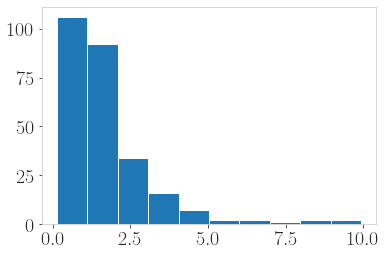

In [12]:
plt.hist(PS1_fits[PS1_fits["CHISQ/NDOF"]<10]["CHISQ/NDOF"]);

## HST

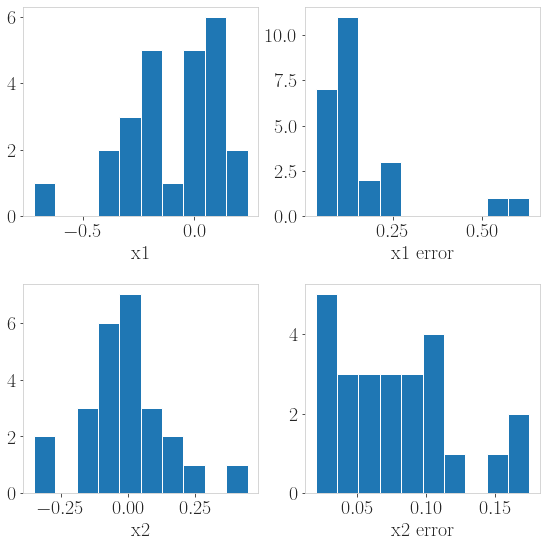

In [13]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

axs[0,0].hist(HST_fits[abs(HST_fits["X1"])<1.]["X1"])
axs[0,0].set_xlabel("x1")
axs[0,1].hist(HST_fits[abs(HST_fits["X1ERR"])<1.]["X1ERR"])
axs[0,1].set_xlabel("x1 error")
axs[1,0].hist(HST_fits[abs(HST_fits["X2/C"])<1.]["X2/C"])
axs[1,0].set_xlabel("x2")
axs[1,1].hist(HST_fits[abs(HST_fits["X2/CERR"])<1.]["X2/CERR"])
axs[1,1].set_xlabel("x2 error")
fig.tight_layout();

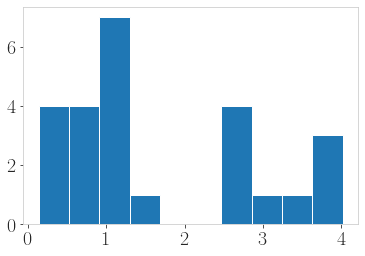

In [14]:
plt.hist(HST_fits["CHISQ/NDOF"]);

#### Visualizando quantas SN de cada subamostra perdemos

In [15]:
df_exp_bf_cuts=pd.concat([PS1_fits,SNLS_fits,SDSS_fits,LOWZ_fits,HST_fits])

In [16]:
x1_2sig=np.percentile(df_exp_bf_cuts[abs(df_exp_bf_cuts["X1"])<10.]["X1"],[1,50,99])
x2_2sig=np.percentile(df_exp_bf_cuts[abs(df_exp_bf_cuts["X2/C"])<10.]["X2/C"],[1,50,99])
x1err_2sig=np.percentile(df_exp_bf_cuts[abs(df_exp_bf_cuts["X1ERR"])<10.]["X1ERR"],[1,50,99])
x2err_2sig=np.percentile(df_exp_bf_cuts[abs(df_exp_bf_cuts["X2/CERR"])<10.]["X2/CERR"],[1,50,99])

In [17]:
df_exp=df_exp_bf_cuts[(df_exp_bf_cuts["X1"]>-0.4) & (df_exp_bf_cuts["X1"]<0.2) &
                      (df_exp_bf_cuts["X2/C"]>-0.2) & (df_exp_bf_cuts["X2/C"]<0.4) &
                      (df_exp_bf_cuts["X1ERR"]>0.) & (df_exp_bf_cuts["X1ERR"]<1.) &
                      (df_exp_bf_cuts["X2/CERR"]>0.) & (df_exp_bf_cuts["X2/CERR"]<1.) &
                      (df_exp_bf_cuts["CHISQ/NDOF"]<=15.)].reset_index(drop=True)

In [18]:
SDSS_after_cuts=len(df_exp[df_exp["SURVEY"]=="SDSS"])
SNLS_after_cuts=len(df_exp[df_exp["SURVEY"]=="SNLS"])
PS1_after_cuts=len(df_exp[df_exp["SURVEY"]=="PS1MD"])
HST_after_cuts=len(df_exp[df_exp["SURVEY"]=="PS1_HST_COMBINED(CANDELS)"])+len(df_exp[df_exp["SURVEY"]=="PS1_HST_COMBINED(HST)"])+len(df_exp[df_exp["SURVEY"]=="PS1_HST_COMBINED(SNAP)"])
LOWZ_after_cuts=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3S)"])+len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3K)"])+len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p1)"])+len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p2)"])+len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CSP)"])+len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA1)"])+len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA2)"])

In [19]:
hst_comb=pd.concat((df_exp[df_exp["SURVEY"]=="PS1_HST_COMBINED(CANDELS)"], df_exp[df_exp["SURVEY"]=="PS1_HST_COMBINED(HST)"],df_exp[df_exp["SURVEY"]=="PS1_HST_COMBINED(SNAP)"]),axis=0).reset_index(drop=True)

In [20]:
lowz_comb=pd.concat((df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3S)"],df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3K)"],
                     df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p1)"],df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p2)"],
                     df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA1)"],df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA2)"]),axis=0).reset_index(drop=True)

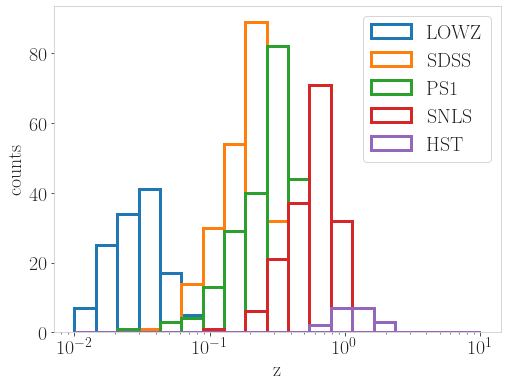

In [21]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

bins=np.logspace(-2,1,20)
ax.hist(lowz_comb["Z"],color="C0",bins=bins,label="LOWZ",edgecolor="C0",fill=False,lw=3)
ax.hist(df_exp[df_exp["SURVEY"]=="SDSS"]["Z"],color="C1",bins=bins,label="SDSS",edgecolor="C1",fill=False,lw=3)
ax.hist(df_exp[df_exp["SURVEY"]=="PS1MD"]["Z"],color="C2",bins=bins,label="PS1",edgecolor="C2",fill=False,lw=3)
ax.hist(df_exp[df_exp["SURVEY"]=="SNLS"]["Z"],color="C3",bins=bins,label="SNLS",edgecolor="C3",fill=False,lw=3)
ax.hist(hst_comb["Z"],color="C4",bins=bins,label="HST",edgecolor="C4",fill=False,lw=3)
ax.set_xlabel("z")
ax.set_ylabel("counts")
ax.set_xscale("log")
ax.legend();

In [22]:
print(f"SDSS antes dos cortes: {len(SDSS_fits)}, após os cortes: {SDSS_after_cuts}")
print(f"SNLS antes dos cortes: {len(SNLS_fits)}, após os cortes: {SNLS_after_cuts}")
print(f"PS1 antes dos cortes: {len(PS1_fits)}, após os cortes: {PS1_after_cuts}")
print(f"HST antes dos cortes: {len(HST_fits)}, após os cortes: {HST_after_cuts}")
print(f"LOWZ antes dos cortes: {len(LOWZ_fits)}, após os cortes: {LOWZ_after_cuts}")

SDSS antes dos cortes: 315, após os cortes: 223
SNLS antes dos cortes: 232, após os cortes: 168
PS1 antes dos cortes: 272, após os cortes: 218
HST antes dos cortes: 25, após os cortes: 19
LOWZ antes dos cortes: 172, após os cortes: 137


In [23]:
CFA3S_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3S)"])
CFA3S=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3S)"])
CFA3K_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3K)"])
CFA3K=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA3K)"])
CFA4p1_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p1)"])
CFA4p1=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p1)"])
CFA4p2_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p2)"])
CFA4p2=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA4p2)"])
CSP_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CSP)"])
CSP=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CSP)"])
CFA1_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CFA1)"])
CFA1=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA1)"])
CFA2_bf=len(LOWZ_fits[LOWZ_fits["SURVEY"]=="PS1_LOWZ_COMBINED(CFA2)"])
CFA2=len(df_exp[df_exp["SURVEY"]=="PS1_LOWZ_COMBINED(CFA2)"])

In [24]:
print(f"CFA3S antes dos cortes: {CFA3S_bf}, após os cortes: {CFA3S}")
print(f"CFA3K antes dos cortes: {CFA3K_bf}, após os cortes: {CFA3K}")
print(f"CFA4p1 antes dos cortes: {CFA4p1_bf}, após os cortes: {CFA4p1}")
print(f"CFA4p2 antes dos cortes: {CFA4p2_bf}, após os cortes: {CFA4p2}")
print(f"CSP antes dos cortes: {CSP_bf}, após os cortes: {CSP}")
print(f"CFA1 antes dos cortes: {CFA1_bf}, após os cortes: {CFA1}")
print(f"CFA2 antes dos cortes: {CFA2_bf}, após os cortes: {CFA2}")

CFA3S antes dos cortes: 31, após os cortes: 25
CFA3K antes dos cortes: 60, após os cortes: 45
CFA4p1 antes dos cortes: 33, após os cortes: 30
CFA4p2 antes dos cortes: 10, após os cortes: 6
CSP antes dos cortes: 11, após os cortes: 7
CFA1 antes dos cortes: 9, após os cortes: 9
CFA2 antes dos cortes: 18, após os cortes: 15


### Visualizando distribuições e correlações EXP

In [25]:
total_exp=len(df_exp_bf_cuts)
passcut_exp_x1=len(df_exp_bf_cuts[(df_exp_bf_cuts["X1"]>=-0.4) & (df_exp_bf_cuts["X1"]<=0.2)])
passcut_exp_x2=len(df_exp_bf_cuts[(df_exp_bf_cuts["X2/C"]>=-0.2) & (df_exp_bf_cuts["X2/C"]<=0.4)])
passcut_exp_chi2=len(df_exp_bf_cuts[df_exp_bf_cuts["CHISQ/NDOF"]<=10.])
passcut_exp_x1err=len(df_exp_bf_cuts[df_exp_bf_cuts["X1ERR"]<=1.])
passcut_exp_x2err=len(df_exp_bf_cuts[df_exp_bf_cuts["X2/CERR"]<=1.])

De um total 1048 SNe, 1016 foram bem ajustadas.
191 não passaram no corte de -0.4 < X1 < 0.2
76 não passaram no corte de -0.2 < X2 < 0.4
37 não passaram no corte de Chi2 < 10.
21 não passaram no corte de x1err < 1.
8 não passaram no corte de x2err < 1.
No final ficamos com 765 Sne.


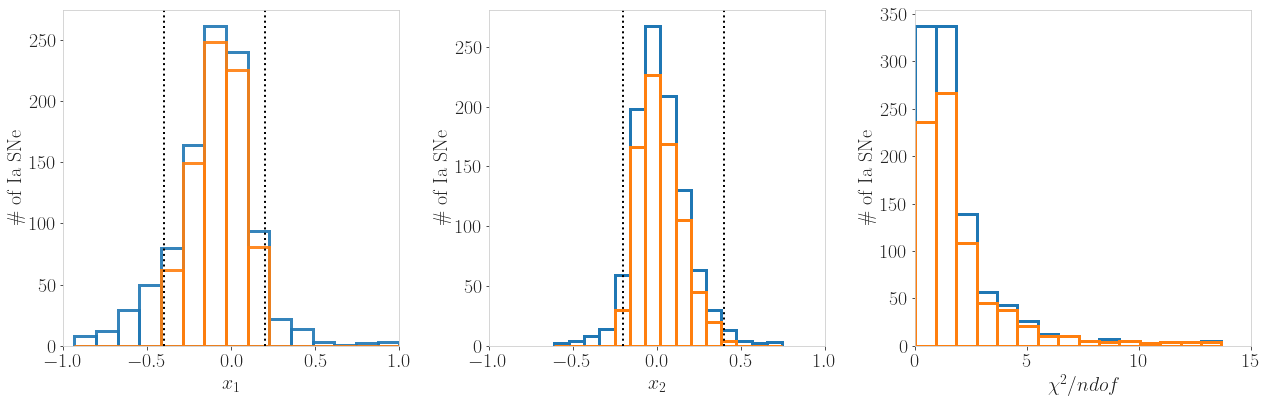

In [26]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3,figsize=(18,6))

bins = 15
bf_cuts_reduced=df_exp_bf_cuts[abs(df_exp_bf_cuts["X1"])<=1.]
bins = np.histogram(np.hstack((bf_cuts_reduced["X1"], df_exp["X1"])), bins=bins)[1]
ax1.hist(df_exp_bf_cuts["X1"],bins=bins,edgecolor="C0",alpha=0.9,fill=False,lw=3)
ax1.hist(df_exp["X1"],bins=bins,edgecolor="C1",alpha=0.9,fill=False,lw=3)
ax1.set_xlabel(r"$x_1$")
ax1.set_ylabel("\# of Ia SNe")
ax1.set_xlim(-1,1)
ax1.axvline(0.2,c="k",ls=":",lw=2)
ax1.axvline(-0.4,c="k",ls=":",lw=2)

bins = 15
bf_cuts_reduced=df_exp_bf_cuts[abs(df_exp_bf_cuts["X2/C"])<=1.]
bins = np.histogram(np.hstack((bf_cuts_reduced["X2/C"], df_exp["X2/C"])), bins=bins)[1]
ax2.hist(df_exp_bf_cuts["X2/C"],bins=bins,edgecolor="C0",fill=False,lw=3)
ax2.hist(df_exp["X2/C"],bins=bins,edgecolor="C1",fill=False,lw=3)
ax2.set_xlabel(r"$x_2$")
ax2.set_ylabel("\# of Ia SNe")
ax2.set_xlim(-1,1)
ax2.axvline(0.4,c="k",ls=":",lw=2)
ax2.axvline(-0.2,c="k",ls=":",lw=2)

bins = 15
bf_cuts_reduced=df_exp_bf_cuts[df_exp_bf_cuts["CHISQ/NDOF"]<=15.]
bins = np.histogram(np.hstack((bf_cuts_reduced["CHISQ/NDOF"], df_exp["CHISQ/NDOF"])), bins=bins)[1]
ax3.hist(df_exp_bf_cuts["CHISQ/NDOF"],bins=bins,edgecolor="C0",fill=False,lw=3)
ax3.hist(df_exp["CHISQ/NDOF"],bins=bins,edgecolor="C1",fill=False,lw=3)
ax3.set_xlabel(r"$\chi^2/ndof$")
ax3.set_ylabel("\# of Ia SNe")
ax3.set_xlim(0,15)
#ax3.axvline(10.,c="k",ls=":",lw=2)
fig.tight_layout()

print(f"De um total 1048 SNe, {total_exp} foram bem ajustadas.")
print(f"{total_exp-passcut_exp_x1} não passaram no corte de -0.4 < X1 < 0.2")
print(f"{total_exp-passcut_exp_x2} não passaram no corte de -0.2 < X2 < 0.4")
print(f"{total_exp-passcut_exp_chi2} não passaram no corte de Chi2 < 10.")
print(f"{total_exp-passcut_exp_x1err} não passaram no corte de x1err < 1.")
print(f"{total_exp-passcut_exp_x2err} não passaram no corte de x2err < 1.")
print(f"No final ficamos com {len(df_exp)} Sne.")

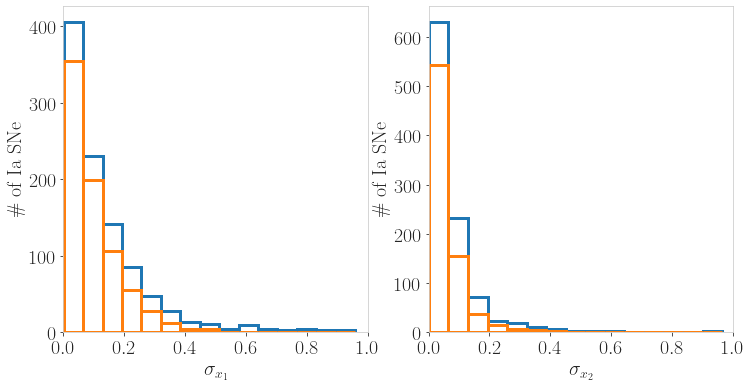

In [27]:
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(12,6))

bins = 15
bf_cuts_reduced=df_exp_bf_cuts[df_exp_bf_cuts["X1ERR"]<=1.]
bins = np.histogram(np.hstack((bf_cuts_reduced["X1ERR"], df_exp["X1ERR"])), bins=bins)[1]
ax1.hist(df_exp_bf_cuts["X1ERR"],bins=bins,edgecolor="C0",fill=False,lw=3)
ax1.hist(df_exp["X1ERR"],bins=bins,edgecolor="C1",fill=False,lw=3)
ax1.set_xlabel(r"$\sigma_{x_1}$")
ax1.set_ylabel("\# of Ia SNe")
ax1.set_xlim(0,1)
#ax1.axvline(10,c="k",ls=":",lw=2)

bins = 15
bf_cuts_reduced=df_exp_bf_cuts[df_exp_bf_cuts["X2/CERR"]<=1.]
bins = np.histogram(np.hstack((bf_cuts_reduced["X2/CERR"], df_exp["X2/CERR"])), bins=bins)[1]
ax2.hist(df_exp_bf_cuts["X2/CERR"],bins=bins,edgecolor="C0",fill=False,lw=3)
ax2.hist(df_exp["X2/CERR"],bins=bins,edgecolor="C1",fill=False,lw=3)
ax2.set_xlabel(r"$\sigma_{x_2}$")
ax2.set_ylabel("\# of Ia SNe")
ax2.set_xlim(0,1);
#ax2.axvline(0,c="k",ls=":",lw=2);

In [28]:
df_exp["SNNAME"].astype(str).values

array(['11', '34', '91', '142', '190', '199', '215', '236', '420',
       '20027', '20096', '20176', '30066', '40166', '40782', '50005',
       '50251', '50293', '70955', '90201', '91869', '100090', '100213',
       '100405', '110033', '110478', '110719', '110734', '120085',
       '120094', '120336', '120400', '120585', '130308', '130514',
       '130862', '140181', '150509', '160039', '160099', '160197',
       '170428', '180166', '190230', '190260', '300105', '310025',
       '310073', '310091', '310161', '310238', '310574', '320258',
       '330022', '330089', '330128', '330146', '340334', '350078',
       '350083', '350233', '350548', '360112', '360140', '360156',
       '370098', '370333', '370356', '370428', '370563', '380279',
       '380378', '390471', '420159', '420407', '420417', '440008',
       '440042', '440162', '450175', '460003', '460105', '470008',
       '470041', '470232', '470244', '480064', '480464', '490008',
       '500004', '500057', '500100', '510251', '510578